In [39]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


In [40]:
def load_dataset():
    with h5py.File('datasets\\train_catvnoncat.h5', "r") as train_dataset:
        train_set_x_orig = np.array(train_dataset["train_set_x"][:])
        train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    with h5py.File('datasets\\test_catvnoncat.h5', "r") as test_dataset:
        test_set_x_orig = np.array(test_dataset["test_set_x"][:])
        test_set_y_orig = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [41]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


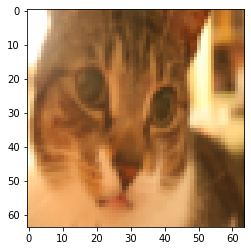

In [42]:
index = 200
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [43]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [44]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.


In [45]:
def sigmoid(z):
    A = 1./(1+np.exp(-z))
    return A

In [46]:
def initialization(f):
    w= np.zeros((f, 1))
    b=0
    assert(w.shape == (f, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w,b

In [85]:
def propagate(w,b,x,y):
    try:
        m = x.shape[1]
        A=sigmoid(np.dot(w.T,x)+b)
        J=(-1/(m))*(np.sum(y*np.log(A)+(1-y)*np.log(1-A)))

        dJw=(np.dot(x, (A - y).T))/ (m)
        dJb=(np.sum(A-y))/m
    except:
        print(A)
    
    assert(dJw.shape == w.shape)
    assert(dJb.dtype == float)
    J = np.squeeze(J)
    assert(J.shape == ())
    grads={"dJw":dJw,
          "dJb":dJb}
    return grads,J

In [84]:
def optimize(w,b,x,y,r,num_iterations,print_cost=False):
    costs = []
    
    for i in range(num_iterations):
        grads, J = propagate(w, b, x, y)
        dJw = grads["dJw"]
        dJb = grads["dJb"]
        
        w = w - r * dJw
        b = b - r * dJb

        if i % 100 == 0:
            costs.append(J)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, J))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dJw": dJw,
             "dJb": dJb}
    
    return params, grads, costs

In [49]:
def predict(w,b,x):
    m = x.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(x.shape[0], 1)              #??
    A=sigmoid(np.dot(w.T,x)+b)
    for i in range(0,m):
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1  
        else:
            Y_prediction[0,i]= 0
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [65]:
def model(x_train, y_train, x_test, y_test,r = 0.5,num_iterations = 3, print_cost = False):
    w,b=initialization(x_train.shape[0])
    params, grads, costs = optimize(w,b,x_train,y_train,r,num_iterations,print_cost)
    w=params["w"]
    b=params["b"]
    y_prediction_test=predict(w,b,x_test)              #??
    y_prediction_train=predict(w,b,x_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    d={"costs":costs,
      "y_prediction_test": y_prediction_test,
      "y_prediction_train": y_prediction_train,
      "w":w,
      "b":b,
      "r":r,
      "num_iterations":num_iterations}
    return d

In [83]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, r = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


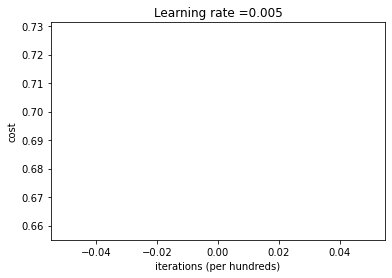

In [55]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["r"]))
plt.show()

[[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0
  0 1 0 0 1 1 1 0 0 0 1 1 1 0]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1.]]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

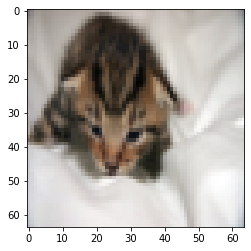

In [62]:
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print(test_set_y)
print(d["y_prediction_test"])

print ("y = " + str(test_set_y[0][index]) + ", you predicted that it is a \"" + classes[d["y_prediction_test"][0][index]].decode("utf-8") +  "\" picture.")